Fitting 10 folds for each of 200 candidates, totalling 2000 fits
accuracy = 0.9636363636363636
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.96      0.96      0.96        24
           2       1.00      1.00      1.00        17

    accuracy                           0.96        55
   macro avg       0.96      0.96      0.96        55
weighted avg       0.96      0.96      0.96        55

SVC(C=10.0, gamma=1.0)
lowest RMSE = 0.26967994498529685


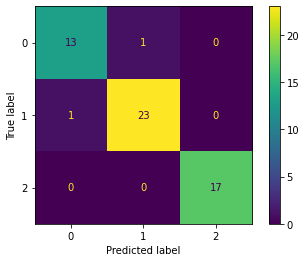

In [1]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import dill


import pandas as pd
df = pd.read_csv(r"./csv/clipped/all.csv", encoding="utf-8-sig", delimiter=',', thousands=r',', dtype=None, chunksize=None)
X = df.drop(columns=['label','label_int'])
y = df['label_int']


import shutup
shutup.please()


X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


from sklearn.model_selection import train_test_split
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)


from sklearn.svm import SVC
import numpy as np
svc = SVC()
param_grid = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 
    'C': [np.float_power(10, i) for i in np.arange(-5, 5, 1)],
    'gamma': [np.float_power(10, i) for i in np.arange(0, -5, -1)],
    # 'epsilon': [0.07, 0.085]
}
svc_lowest_mse = GridSearchCV(svc, param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1)
svc_lowest_mse.fit(X_pca_train, y_train)

from sklearn import metrics
y_pred = svc_lowest_mse.predict(X_pca_test)
print('accuracy =', metrics.accuracy_score(y_test, y_pred))


from sklearn.metrics import plot_confusion_matrix, classification_report
plot_confusion_matrix(svc_lowest_mse, X_pca_test, y_test)  
print(classification_report(y_test, y_pred, labels=[0, 1, 2]))


from numpy import average, median
print(svc_lowest_mse.best_estimator_)
rmse_lowest = (-svc_lowest_mse.best_score_)**(1/2.0)
print("lowest RMSE =", rmse_lowest)

In [ ]:
import dill
dill.load_session('sessions/best_classifier.pkl')

In [2]:
import dill
dill.dump_session('sessions/best_classifier.pkl')